## **TITANIC SURVIVAL**

**Lab Exercise**

Data is taken from https://www.kaggle.com/c/titanic/data

The training set will be used to build your machine learning models.

## Step 1: Load the data

In [61]:
#Load libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Load data in dataframe

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

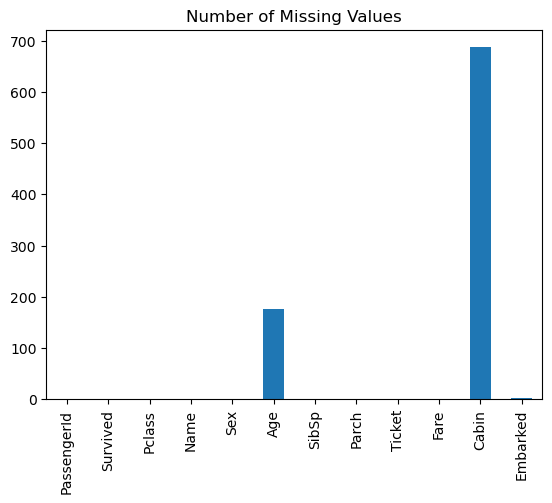

In [14]:
# A bar chart showing how many missing values are in each column
df.isnull().sum().plot(kind='bar')
plt.title('Number of Missing Values');

## Step 2: Cleaning the data

In [17]:
# Delete all rows where `Embarked` is empty
df.dropna(subset=['Embarked'], inplace=True)

In [19]:
# Fill all empty cabins with **¯\\_(ツ)_/¯**
df['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

In [21]:
# Check cleaned data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature extraction

In [24]:
# There are two columns 
# Creating a new column called `FamilyCount` which will be the sum of two columns that pertain to how many family members are on the boat for a given person.
df['Family_Count'] = df['SibSp'] + df['Parch']

In [25]:
# Creating a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
# Function to check if the name contains "Reverend"
def is_reverend(name):
    if 'Rev.' in name:
        return 1
    else:
        return 0

# Apply the function to each row in the DataFrame
df['IsReverend'] = df['Name'].apply(is_reverend)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [26]:
# Creating 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column.

# Use get_dummies() to create dummy variables for the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'])

# Rename the columns to match the specified format
embarked_dummies.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# List of columns where you want to replace False and True values
columns_to_replace = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Replace False and True values with 0 and 1 respectively in specified columns
df[columns_to_replace] = df[columns_to_replace].replace({False: 0, True: 1})

In [27]:
# Creating columns for `Sex`= 1's if male, and 0's if female

# Use get_dummies() to create dummy variables for the 'Sex' column
embarked_dummies = pd.get_dummies(df['Sex'])

# Rename the columns to match the specified format
embarked_dummies.columns = ['Male', 'Female']

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# List of columns where you want to replace False and True values
columns_to_replace = ['Male', 'Female']

# Replace False and True values with 0 and 1 respectively in specified columns
df[columns_to_replace] = df[columns_to_replace].replace({False: 1, True: 0})

In [29]:
# Extract the title from name. Creating columns for `Master`= 1's if has Master in his title, and 0's if not
# Function to check if the name contains "Master"
def is_master(name):
    if 'Master' in name:
        return 1
    else:
        return 0

# Apply the function to each row in the DataFrame
df['Master'] = df['Name'].apply(is_master)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,1,0,0


In [30]:
# Extract the title from name. Creating columns for `Miss`= 1's if has Miss in the title, and 0's if not.
# Function to check if the name contains "Miss"
def is_miss(name):
    if 'Miss' in name:
        return 1
    else:
        return 0

# Apply the function to each row in the DataFrame
df['Miss'] = df['Name'].apply(is_miss)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family_Count,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0,0,0,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,1,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,0,1,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,0,0,0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,0,1,1,0,0,0


In [31]:
# Extract the title from name. Creating columns for `Mrs`= 1's if has Mrs in the title, and 0's if not.
# Function to check if the name contains "Mrs"
def is_mrs(name):
    if 'Mrs' in name:
        return 1
    else:
        return 0

# Apply the function to each row in the DataFrame
df['Mrs'] = df['Name'].apply(is_mrs)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Count,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,1,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,1,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,1,0,0,0,0


In [32]:
# Extract the title from name. Creating columns for `Mr`= 1's if has Mr in the title, and 0's if not.
# Function to check if the name contains "Mr"
def is_mr(name):
    if 'Mr' in name:
        return 1
    else:
        return 0

# Apply the function to each row in the DataFrame
df['Mr'] = df['Name'].apply(is_mr)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs,Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,1,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,1,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,1,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,1,1,0,0,0,0,1


## Step 4: Exploratory analysis 

1. What was the survival rate overall? Survival Rate  = 38.2%
2. What is the average age of those who survived? Average age Survived = 28.2 yo, Average age did not survive = 30.6 yo.
3. Which gender fared the worst? What was their survival rate? Male survivale rate = 18.9%, Female Survival rate = 74%
4. What was the survival rate for each `Pclass`? P1 = 62.6%, P2 = 47.3%, P3 = 24.2%
5. Did any reverends survive? How many? No reverand survived.
6. What is the survival rate for cabins marked **¯\\_(ツ)_/¯** ¯\(ツ)/¯ survivale rate = 30%
7. What is the survival rate for people whose `Age` is empty? Survival Rate  = 29.4%
8. What is the survival rate for each port of embarkation? Embark C = 55.4%, Embark Q = 39.0%, Embark S = 33.7%
9. What is the survival rate for children (under 12) in each `Pclass`? P1 = 75%, P2 = 100%, P3 = 40.4%
10. Did the captain of the ship survive? Is he on the list? Captain did not survive.
11. Of all the people that died, who had the most expensive ticket? How much did it cost? $263
12. Does having family on the boat help or hurt your chances of survival? Having family member helps, for those who survived, those who doesn't have family member only have 30% chance of survival.

In [34]:
# Average survival rate
df['Survived'].mean()

0.38245219347581555

In [38]:
# Average age of those who survived and those who did not
ave_age_survive = df[df['Survived']==1]['Age'].mean()
ave_age_survive

28.19329861111111

In [37]:
# Average age of those who did not survived
ave_age_notsurvive = df[df['Survived']==0]['Age'].mean()
ave_age_notsurvive

30.62617924528302

In [40]:
# Survival rate for each gender

df.groupby('Male').mean([['Survived']])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Count,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Master,Miss,Mrs,Mr
Male,,,,,,,,,,,,,,,,,
0,430.932692,0.740385,2.166667,27.745174,0.698718,0.653846,44.252124,1.352564,0.000000,0.233974,0.115385,0.650641,1.0,0.000000,0.580128,0.410256,0.410256
1,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.665511,0.010399,0.164645,0.071057,0.764298,0.0,0.069324,0.000000,0.000000,0.897747


In [39]:
# Survival rate for each Pclass?

df.groupby('Pclass').mean([['Survived']])

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family_Count,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs,Mr
Pclass,,,,,,,,,,,,,,,,,
1,461.742991,0.626168,38.105543,0.420561,0.359813,84.193516,0.780374,0.000000,0.397196,0.009346,0.593458,0.570093,0.429907,0.014019,0.210280,0.200935,0.705607
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.782609,0.032609,0.092391,0.016304,0.891304,0.586957,0.413043,0.048913,0.184783,0.233696,0.728261
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,1.008147,0.000000,0.134420,0.146640,0.718941,0.706721,0.293279,0.057026,0.207739,0.085540,0.735234


In [41]:
#Did any reverends survive?

df.groupby('IsReverend').mean([['Survived']])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Count,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs,Mr
IsReverend,,,,,,,,,,,,,,,,,
0,445.730464,0.385051,2.313703,29.527153,0.526614,0.383918,32.190345,0.910532,0.19026,0.086070,0.723669,0.646659,0.353341,0.0453,0.204983,0.14496,0.731597
1,485.666667,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,0.333333,0.00000,0.166667,0.833333,1.000000,0.000000,0.0000,0.000000,0.00000,0.000000


In [42]:
# Survival rate for cabins marked ¯\(ツ)/¯

df.groupby('Cabin').mean([['Survived']])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Count,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs,Mr
Cabin,,,,,,,,,,,,,,,,,,
A10,584.000000,0.000000,1.00000,36.000000,0.000000,0.000000,40.125000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
A14,476.000000,0.000000,1.00000,NaN,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
A16,557.000000,1.000000,1.00000,48.000000,1.000000,0.000000,39.600000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
A19,285.000000,0.000000,1.00000,NaN,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
A20,600.000000,1.000000,1.00000,49.000000,1.000000,0.000000,56.929200,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F38,777.000000,0.000000,3.00000,NaN,0.000000,0.000000,7.750000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
F4,401.500000,1.000000,2.00000,2.500000,2.000000,1.000000,39.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000
G6,216.000000,0.500000,3.00000,14.750000,0.500000,1.250000,13.581250,1.750000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.500000


In [44]:
# Survival rate for people whose `Age` is empty

df[df['Age'].isnull()][['Survived']].mean()

Survived    0.293785
dtype: float64

In [46]:
# Survival rate for each port of embarkation

for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print(col, ':')
    print(df[df[col] == 1][['Survived']].mean())
    print()

Embarked_C :
Survived    0.553571
dtype: float64

Embarked_Q :
Survived    0.38961
dtype: float64

Embarked_S :
Survived    0.336957
dtype: float64



In [48]:
# Survival rate for children (under 12) in each `Pclass`

# Convert 'Age' column to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter passengers under 12 years old
children = df[df['Age'] < 12]

# Group by Pclass and calculate survival rate
children.groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [49]:
df[df['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs,Mr
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,...,0,0,0,1,1,0,0,0,0,0


In [51]:
# Among the passengers who did not survive, how much is the most expensive ticket fare?

df[df['Survived'] == 0].sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs,Mr
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,0,0,0,1,1,0,0,0,0,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,...,0,0,0,1,1,0,0,0,0,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,...,0,1,0,0,1,0,0,0,0,1
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,...,0,1,0,0,1,0,0,0,0,1
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,...,0,0,0,1,1,0,0,0,0,1


In [53]:
# Does having family on the boat help or hurt your chances of survival?

df.groupby('Family_Count').mean([['Survived']])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Male,Female,Master,Miss,Mrs,Mr
Family_Count,,,,,,,,,,,,,,,,,
0,458.044860,0.300935,2.405607,32.131841,0.000000,0.000000,21.023035,0.007477,0.158879,0.106542,0.734579,0.768224,0.231776,0.000000,0.185047,0.041121,0.783178
1,412.838509,0.552795,1.919255,31.391511,0.763975,0.236025,49.894129,0.012422,0.316770,0.055901,0.627329,0.459627,0.540373,0.018634,0.167702,0.372671,0.801242
2,448.352941,0.578431,2.225490,26.035806,0.872549,1.127451,39.692482,0.000000,0.225490,0.058824,0.715686,0.519608,0.480392,0.147059,0.215686,0.264706,0.607843
3,514.344828,0.724138,2.068966,18.274815,1.344828,1.655172,54.864510,0.000000,0.241379,0.000000,0.758621,0.344828,0.655172,0.137931,0.344828,0.310345,0.517241
4,367.866667,0.200000,2.666667,20.818182,2.133333,1.866667,58.094453,0.000000,0.133333,0.000000,0.866667,0.200000,0.800000,0.133333,0.600000,0.200000,0.266667
5,400.136364,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727,0.000000,0.000000,0.227273,0.772727,0.636364,0.363636,0.409091,0.181818,0.181818,0.409091
6,355.750000,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667,0.250000,0.500000,0.166667,0.250000
7,393.833333,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000,0.000000,0.000000,0.000000,1.000000,0.666667,0.333333,0.500000,0.166667,0.166667,0.333333
10,481.714286,0.000000,3.000000,NaN,8.000000,2.000000,69.550000,0.000000,0.000000,0.000000,1.000000,0.571429,0.428571,0.142857,0.428571,0.000000,0.428571


In [57]:
print(df['Pclass'].unique())
print(df['Survived'].unique())


[3 1 2]
[0 1]


## Step 5: Plotting

AttributeError: 'numpy.int64' object has no attribute 'startswith'

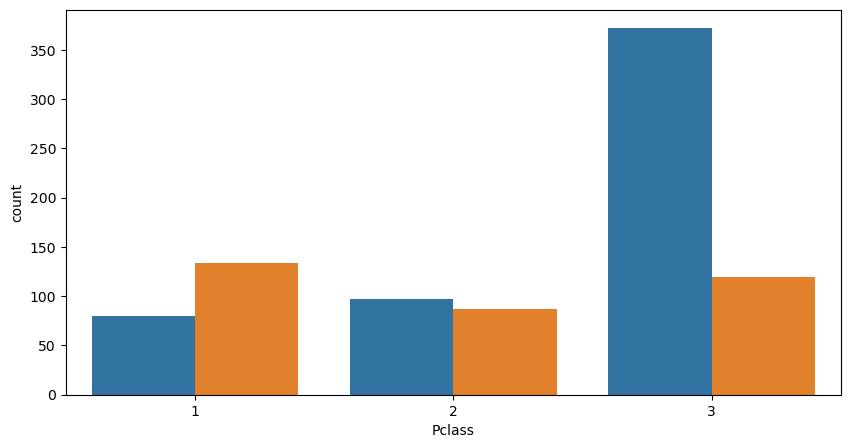

In [58]:
# Bar plot showing count of survivors and non-survivors in each Pclass
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Count of Survivors and Non-Survivors in Each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Stacked bar plot showing survival rate of each Pclass
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Survival Rate of Each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

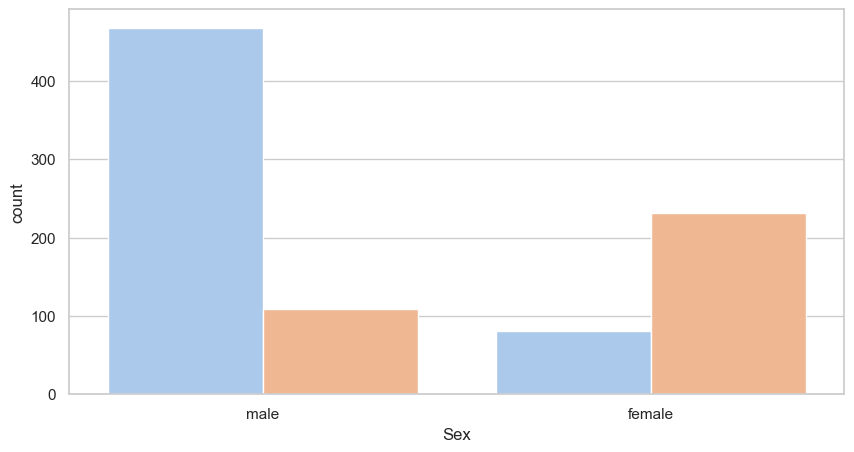

In [69]:
# Count plot showing count of survivors and non-survivors by gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Count of Survivors and Non-Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

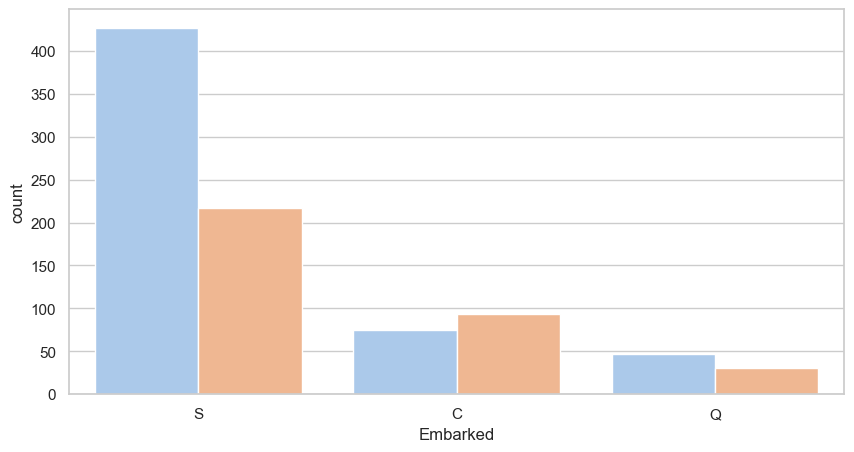

In [68]:
# Bar plot showing count of survivors and non-survivors by embarked location
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='pastel')
plt.title('Count of Survivors and Non-Survivors by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


C:\Users\60149\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


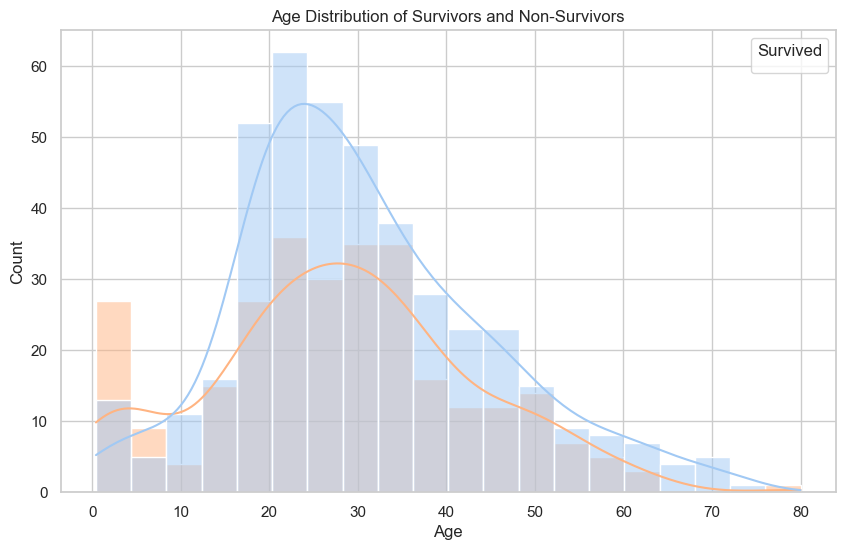

In [64]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting histogram of age distribution among survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True, palette='pastel')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

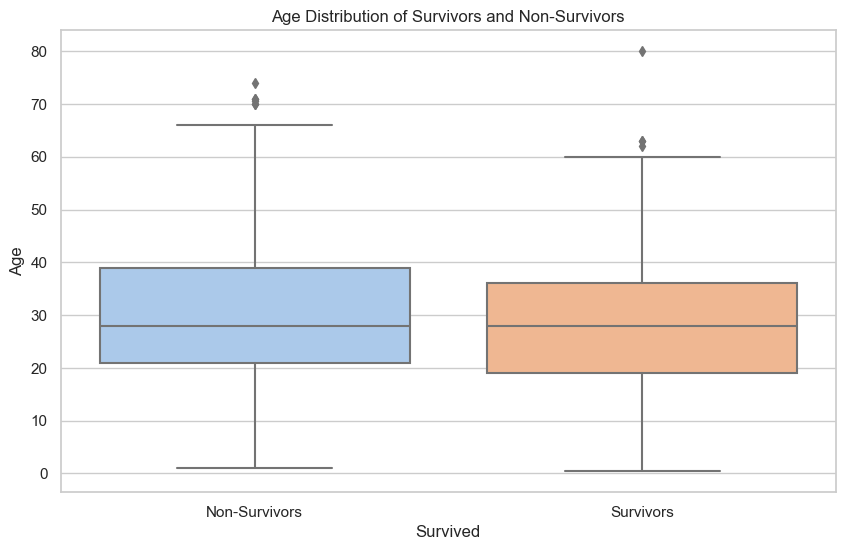

In [65]:
# Plotting box plot of age distribution among survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

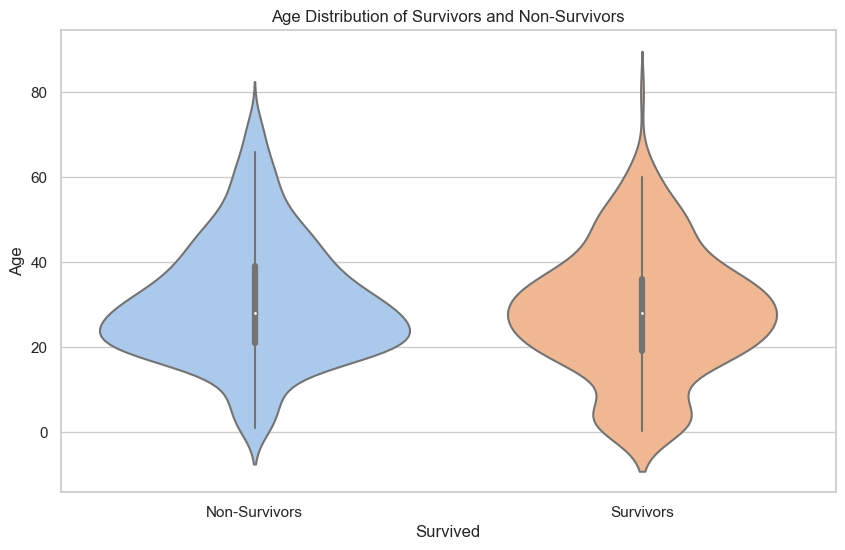

In [66]:
# Plotting violin plot of age distribution among survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette='pastel')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()